In [11]:
# Import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
### Step 1              
### Data import/ loading
### 3 data sets are loaded below
### Data 1 : CSV file / source: kaggle / Information : WFH vs WFO prediction data set 
########### source: kaggle {https:https://www.kaggle.com/datasets/anninasimon/predict-if-people-prefer-wfh-verses-wfo-data}
########### Context from data owner: Since the pandemic began, most of us have been working from home. I wanted to see if people 
########### preferred working from home or they missed going back to office. So I conducted a survey and I decided to use 
########### this real data to see to what accuracy algorithm can predict the results.
### Data 2 : CSV file  
########### source: kaggle {https://www.kaggle.com/datasets/blurredmachine/are-your-employees-burning-out}
########### Context from data owner: Understanding what will be the Burn Rate for the employee working in an organization based on
########### the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected
########### based on various conditions provided?
### Data 3 : data from web   
########### source: kaggle { https://www.coingecko.com/en/api/documentation}
########### Note: I decided to use this dataset to import using API as I was not able to find relevant data that fits in with
########### analysis. 



In [13]:
# Import the data from CSV:EU WFH info 

data1 = pd.read_csv("WFH_WFO_dataset.csv")
data1.head()



,ID,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Test_Null
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1,NaN
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1,NaN
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1,NaN
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0,NaN
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1,NaN


In [14]:
data2 = pd.read_csv("Burn-Out stat.csv")
data2.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [16]:
# importing web daily market share 
# Source: https://www.coingecko.com/en/api/documentation
import requests
API_Data = requests.get('https://api.coingecko.com/api/v3/companies/public_treasury/bitcoin')

In [17]:
# 200 is good 
print(API_Data.status_code)

200


In [18]:
print(API_Data.text)

{"total_holdings":225413.6658,"total_value_usd":4802234593.411153,"market_cap_dominance":1.18,"companies":[{"name":"MicroStrategy Inc.","symbol":"NASDAQ:MSTR","country":"US","total_holdings":129218,"total_entry_value_usd":3970000000,"total_current_value_usd":2752872801,"percentage_of_total_supply":0.615},{"name":"Tesla","symbol":"NASDAQ: TSLA","country":"US","total_holdings":48000,"total_entry_value_usd":1500000000,"total_current_value_usd":1022596654,"percentage_of_total_supply":0.229},{"name":"Galaxy Digital Holdings","symbol":"TSE:GLXY","country":"CA","total_holdings":16402,"total_entry_value_usd":134000000,"total_current_value_usd":349429798,"percentage_of_total_supply":0.078},{"name":"Square Inc.","symbol":"NASDAQ:SQ","country":"US","total_holdings":8027,"total_entry_value_usd":220000000,"total_current_value_usd":171007986,"percentage_of_total_supply":0.038},{"name":"Marathon Patent Group","symbol":"NASDAQ:MARA","country":"US","total_holdings":4813,"total_entry_value_usd":15000000

In [19]:
data3 = API_Data.json()

In [20]:
print(data3['total_holdings'])


225413.6658


In [21]:
#Print Names of companies 

names = []
countries = []
values = []
for p in data3['companies']: names.append(p['name'])
for c in data3['companies']: countries.append(c['country'])
for d in data3['companies']: values.append(d['total_current_value_usd'])



In [22]:
# extract a table 
zipped = list(zip(names, countries,values))
summary = pd.DataFrame(zipped, columns=['Company', 'Country', 'total_current_value_usd'])
summary


,Company,Country,total_current_value_usd
0,MicroStrategy Inc.,US,2752872801
1,Tesla,US,1022596654
2,Galaxy Digital Holdings,CA,349429798
3,Square Inc.,US,171007986
4,Marathon Patent Group,US,102536618
5,Hut 8 Mining Corp,CA,100640554
6,Coinbase,US,95506266
7,NEXON Co Ltd,Japan,36579134
8,Voyager Digital LTD,CA,26395776
9,"Riot Blockchain, Inc.",US,25032313


<AxesSubplot:xlabel='Country'>

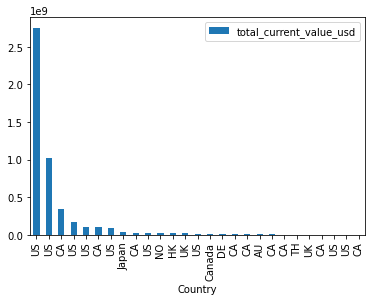

In [23]:
summary.plot(x ='Country', y='total_current_value_usd', kind = 'bar')

<AxesSubplot:xlabel='Company'>

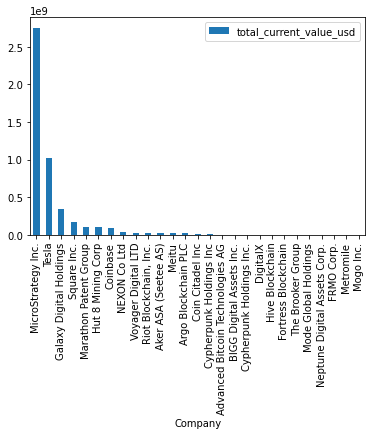

In [24]:
summary.plot(x ='Company', y='total_current_value_usd', kind = 'bar')

In [25]:
############################################################################################################################
############################################### Data Exploration ###########################################################
############################################################################################################################

In [26]:
# retrieving data types of the column of DataFrame
data1.dtypes

ID                               int64
Name                            object
Age                              int64
Occupation                      object
Gender                          object
Same_ofiice_home_location       object
kids                            object
RM_save_money                   object
RM_quality_time                 object
RM_better_sleep                 object
calmer_stressed                 object
RM_professional_growth           int64
RM_lazy                          int64
RM_productive                    int64
digital_connect_sufficient      object
RM_better_work_life_balance      int64
RM_improved_skillset             int64
RM_job_opportunities            object
Target                           int64
Test_Null                      float64
dtype: object

In [27]:
data2.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [28]:
data.columns

NameError: name 'data' is not defined

In [29]:
data1.isnull().sum()

ID                               0
Name                             0
Age                              0
Occupation                       0
Gender                           0
Same_ofiice_home_location        0
kids                             0
RM_save_money                    0
RM_quality_time                  0
RM_better_sleep                  0
calmer_stressed                  0
RM_professional_growth           0
RM_lazy                          0
RM_productive                    0
digital_connect_sufficient       0
RM_better_work_life_balance      0
RM_improved_skillset             0
RM_job_opportunities             0
Target                           0
Test_Null                      207
dtype: int64

In [30]:
print((data2.shape))
print(data2.info())
data2.isnull().sum()


(22750, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
None


Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [31]:
#sns.barplot(x="Occupation", y= "RM_better_work_life_balance", data= data1)

In [32]:
## WFH data did not any null columns, therefore, I have included a column in the csv to 
## demonstrate the drop null columns 
## from the results of the shape, there are now 19 col. rather than 20
dropcolumns = data1.dropna(axis=1)
print(data1.shape,dropcolumns.shape)

(207, 20) (207, 19)


In [33]:
## no duplicates found 
drop_duplicates= data1.drop_duplicates(subset=['ID'])
print(data1.shape,drop_duplicates.shape)

(207, 20) (207, 20)


In [34]:
data11 = data1.fillna(0)


In [35]:
Gender_Age_Data =data1[['Gender', 'Age']] 
print(Gender_Age_Data)
Gender_Age = Gender_Age_Data.groupby(['Gender']).mean()
Gender_Age


     Gender  Age
0    Female   45
1      Male   24
2    Female   53
3    Female   26
4      Male   26
..      ...  ...
202  Female   32
203    Male   52
204    Male   22
205  Female   25
206  Female   23

[207 rows x 2 columns]


,Age
Gender,
Female,30.691589
Male,28.570000


In [36]:
Gender_Age_Data2 =data2[['Gender', 'Burn Rate']] 
print(Gender_Age_Data2)
Gender_Age2 = Gender_Age_Data2.groupby(['Gender']).mean()
Gender_Age2

       Gender  Burn Rate
0      Female       0.16
1        Male       0.36
2      Female       0.49
3        Male       0.20
4      Female       0.52
...       ...        ...
22745  Female       0.41
22746  Female       0.59
22747    Male       0.72
22748  Female       0.52
22749    Male       0.61

[22750 rows x 2 columns]


,Burn Rate
Gender,
Female,0.422788
Male,0.484271


In [37]:
############################################################################################################################
############################################ Merging Data ##################################################################
############################################################################################################################

In [53]:
Merged_Data= Gender_Age.merge(Gender_Age2, left_on=['Gender'], right_on=['Gender'])
Merged_Data


,Age,Burn Rate
Gender,,
Female,30.691589,0.422788
Male,28.570000,0.484271


<AxesSubplot:xlabel='Gender', ylabel='Burn Rate'>

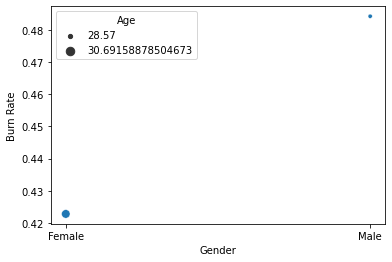

In [55]:
import seaborn as sns

sns.scatterplot(x='Gender',y='Burn Rate', data=Merged_Data, size='Age')

<AxesSubplot:xlabel='Burn Rate', ylabel='WFH Setup Available'>

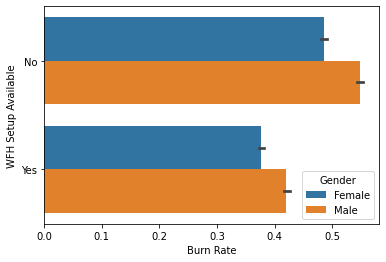

In [61]:
#plot showing the burn rate by gender and whether WFH setup is available. 
sns.barplot(data=data2, y='WFH Setup Available', x='Burn Rate', hue='Gender')

<AxesSubplot:xlabel='RM_better_work_life_balance', ylabel='Occupation'>

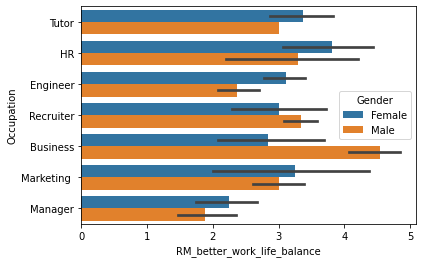

In [68]:
#plot showing the burn rate by gender and whether WFH setup is available. 
sns.barplot(data=data1, y='Occupation', x='RM_better_work_life_balance', hue='Gender')



<AxesSubplot:xlabel='RM_better_work_life_balance', ylabel='Occupation'>

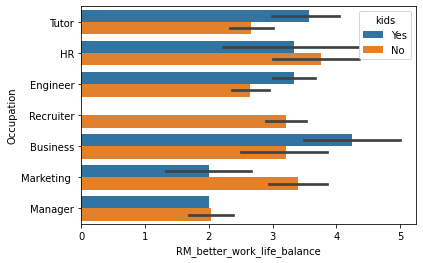

In [69]:
sns.barplot(data=data1, y='Occupation', x='RM_better_work_life_balance', hue='kids')

<AxesSubplot:xlabel='RM_better_work_life_balance', ylabel='Gender'>

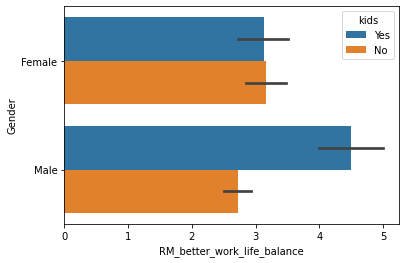

In [70]:
sns.barplot(data=data1, y='Gender', x='RM_better_work_life_balance', hue='kids')